In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [2]:
AdvWorksTest = pd.read_csv('AdvWorksCusts.csv')
AdvWorksTest.columns = [str.replace('-', '_') for str in AdvWorksTest.columns]

for col in AdvWorksTest.columns:
    if AdvWorksTest[col].dtype == object:
        count = 0
        count = [count + 1 for x in AdvWorksTest[col] if x == '?']
        print(col + ' ' + str(sum(count)))
        
AdvWorksTest.shape      

Title 16431
FirstName 0
MiddleName 6985
LastName 0
Suffix 16517
AddressLine1 0
AddressLine2 16243
City 0
StateProvinceName 0
CountryRegionName 0
PostalCode 0
PhoneNumber 0
BirthDate 0
Education 0
Occupation 0
Gender 0
MaritalStatus 0


(16519, 23)

In [3]:
AdvWorksTest.drop('Title', axis = 1, inplace = True)
AdvWorksTest.drop('Suffix', axis = 1, inplace = True)
AdvWorksTest.drop('AddressLine2', axis = 1, inplace = True)
AdvWorksTest.drop('MiddleName', axis = 1, inplace = True)

AdvWorksTest.shape 

(16519, 19)

In [4]:
AW_AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')
AW_BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')

dftemp = pd.merge(AdvWorksTest, AW_AveMonthSpend)
AdvWorks = pd.merge(dftemp, AW_BikeBuyer)

print(AdvWorks.shape)

(17209, 21)


In [5]:
from datetime import datetime

def age_customer(dl):
    Db = datetime.strptime(dl, '%Y-%m-%d')
    dl = datetime.strptime('1998-01-01', '%Y-%m-%d').year - Db.year
 
    if dl > 45: return 'Above 55'
    elif 45 < dl <= 55: return 'Between 45 and 55'
    elif 25 < dl <= 45: return 'Between 25 and 45'
    elif 0 < dl <= 25: return 'Under 25'
    else: return 'None'
        
AdvWorks['GroupCustomers']  = AdvWorks.BirthDate.apply (lambda row: age_customer(row))   

print(AdvWorks.shape)

(17209, 22)


In [6]:
AdvWork_counts = AdvWorks[['CustomerID','BikeBuyer']].groupby(['BikeBuyer']).count()
print(AdvWork_counts) 

           CustomerID
BikeBuyer            
0               11504
1                5705


In [7]:
AdvWork_True = AdvWorks[['CustomerID','Occupation','Gender','MaritalStatus'
                         ,'NumberCarsOwned','NumberChildrenAtHome','YearlyIncome'
                         ,'GroupCustomers','TotalChildren','BikeBuyer']]

print(AdvWork_True.shape)
print(AdvWork_True.CustomerID.unique().shape)
AdvWork_True.head(5)

(17209, 10)
(16404,)


,CustomerID,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,GroupCustomers,TotalChildren,BikeBuyer
0,11000,Professional,M,M,0,0,137947,Between 25 and 45,2,0
1,11001,Professional,M,S,1,3,101141,Between 25 and 45,3,1
2,11002,Professional,M,M,1,3,91945,Between 25 and 45,3,0
3,11003,Professional,F,S,1,0,86688,Between 25 and 45,0,0
4,11004,Professional,F,S,4,5,92771,Between 25 and 45,5,1


In [8]:
print(AdvWorks.groupby('Occupation').size())
print(AdvWorks.groupby('Gender').size())
print(AdvWorks.groupby('MaritalStatus').size())
print(AdvWorks.groupby('NumberCarsOwned').size())
print(AdvWorks.groupby('NumberChildrenAtHome').size())
print(AdvWorks.groupby('YearlyIncome').size())
print(AdvWorks.groupby('GroupCustomers').size())
print(AdvWorks.groupby('TotalChildren').size())
print(AdvWorks.groupby('BikeBuyer').size())

Occupation
Clerical          2751
Management        2830
Manual            2192
Professional      5209
Skilled Manual    4227
dtype: int64
Gender
F    8492
M    8717
dtype: int64
MaritalStatus
M    9307
S    7902
dtype: int64
NumberCarsOwned
0    3901
1    4556
2    6056
3    1499
4    1197
dtype: int64
NumberChildrenAtHome
0    10386
1     2299
2     1504
3     1120
4     1006
5      894
dtype: int64
YearlyIncome
9482      1
10012     1
10030     1
10036     1
10055     1
10063     1
10117     1
10134     1
10135     1
10156     1
10165     1
10180     1
10181     1
10196     1
10207     1
10227     1
10279     1
10317     1
10326     1
10391     1
10404     1
10414     1
10424     1
10452     1
10454     1
10470     1
10471     1
10500     1
10502     1
10506     1
         ..
186731    1
186839    1
186901    1
187053    1
187064    1
187105    1
187169    1
187242    1
187336    1
187383    1
187869    1
187983    1
188246    1
188465    1
188538    1
188633    1
189314    1
189328

In [9]:
print(AdvWork_True.groupby('BikeBuyer').size())

BikeBuyer
0    11504
1     5705
dtype: int64


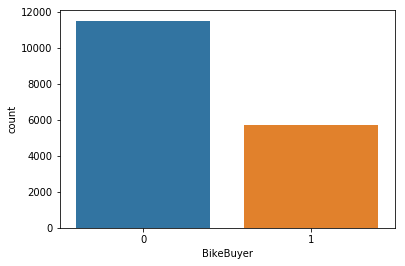

In [10]:
sns.countplot(AdvWork_True['BikeBuyer'],label="Count")
plt.show()

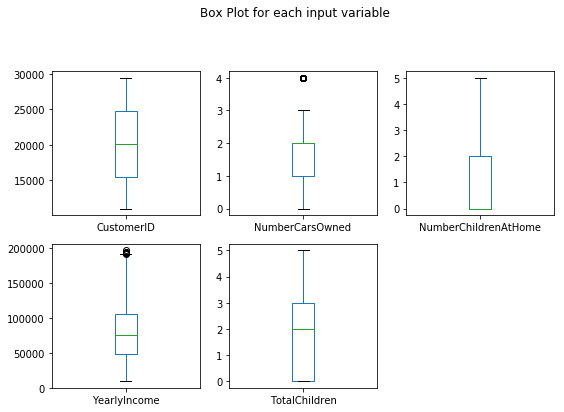

In [11]:
AdvWork_True.drop('BikeBuyer', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('BikeBuyer_box')
plt.show()

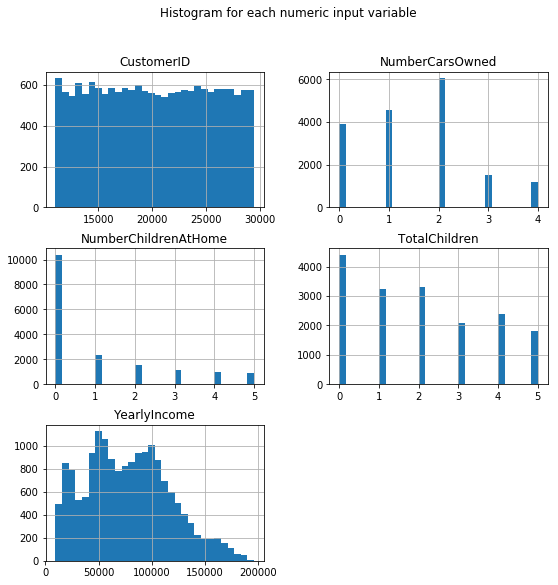

In [12]:
import pylab as pl
AdvWork_True.drop('BikeBuyer' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('BikeBuyer')
plt.show()

In [13]:
AdvWork_True_counts = AdvWork_True[['CustomerID', 'BikeBuyer']].groupby('BikeBuyer').count()
print(AdvWork_True_counts)

           CustomerID
BikeBuyer            
0               11504
1                5705


In [14]:
labels = np.array(AdvWork_True['BikeBuyer'])
print(labels)

[0 1 0 ... 1 0 0]


In [15]:
AdvWork_True.head(5)

,CustomerID,Occupation,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,GroupCustomers,TotalChildren,BikeBuyer
0,11000,Professional,M,M,0,0,137947,Between 25 and 45,2,0
1,11001,Professional,M,S,1,3,101141,Between 25 and 45,3,1
2,11002,Professional,M,M,1,3,91945,Between 25 and 45,3,0
3,11003,Professional,F,S,1,0,86688,Between 25 and 45,0,0
4,11004,Professional,F,S,4,5,92771,Between 25 and 45,5,1


In [16]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Occupation','Gender','MaritalStatus']

Features = encode_string(AdvWork_True['GroupCustomers'])
for col in categorical_columns:
    temp = encode_string(AdvWork_True[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])   

(17209, 12)
[[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]]


In [17]:
AdvWork_MM = np.concatenate([Features, np.array(AdvWork_True[['NumberCarsOwned','NumberChildrenAtHome','YearlyIncome',
                                                       'TotalChildren']])], axis = 1)
print(AdvWork_MM.shape)
print(AdvWork_MM[:2, :])   

(17209, 16)
[[0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.37947e+05 2.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 3.00000e+00 1.01141e+05 3.00000e+00]]


In [18]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(AdvWork_MM.shape[0])
indx = ms.train_test_split(indx, test_size = 500)

X_train = AdvWork_MM[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = AdvWork_MM[indx[1],:]
y_test = np.ravel(labels[indx[1]])

17209
[4379, 8425, 16467, 7252, 5697, 6061, 2316, 6952, 12307, 2391, 7925, 4170, 3240, 9670, 9312, 3014, 15435, 12849, 12769, 6522, 1630, 10895, 5575, 136, 14259, 14780, 11492, 14824, 15675, 8264, 6708, 11681, 537, 16530, 13548, 2734, 4444, 14695, 10173, 15958, 11959, 1193, 6645, 8323, 3087, 16817, 3276, 9449, 12290, 5815, 12958, 11337, 13019, 672, 11964, 6392, 11097, 11266, 11644, 16711, 13336, 7773, 16956, 6757, 5485, 16054, 14858, 11083, 2720, 16849, 7670, 2332, 3939, 10831, 878, 6079, 324, 17003, 4107, 3137, 3068, 10302, 13205, 10715, 8841, 12415, 9613, 750, 4243, 11080, 4430, 13234, 2229, 3195, 14074, 102, 5144, 3115, 13174, 11891, 7997, 4622, 12039, 11133, 2261, 13707, 12776, 2257, 16470, 16031, 4332, 8436, 1921, 9059, 12722, 4132, 5979, 4061, 10036, 1138, 3358, 13892, 6277, 5480, 12582, 3513, 8082, 10119, 13494, 8120, 14504, 7787, 5089, 16409, 15180, 13475, 8492, 6087, 2991, 7671, 16202, 10890, 8402, 7002, 11816, 11431, 15591, 2751, 17005, 13846, 576, 5702, 7123, 11941, 158, 220

[[0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 1.24056e+05
  3.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.18644e+05
  5.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 1.07742e+05
  1.00000e+00]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 3.00000e+00 9.37710e+04
  4.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 2.00000e+00 1.23860e+04
  2.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 6.32750e+04
  0.00000e+00]]
[[1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 7.27990e+04
  5.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 7.41920e+04
  0.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 4.66970e+04
  2.00000e+00]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 3.32260e+04
  0.00000e+00]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 5.55420e+04
  0.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 4.00000e+00 1.58727e+05
  4.00000e+00]]


In [19]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(AdvWork_MM.shape[0])
indx = ms.train_test_split(indx, test_size = 500)

X_train = AdvWork_MM[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = AdvWork_MM[indx[1],:]
y_test = np.ravel(labels[indx[1]])


In [20]:
scaler = preprocessing.StandardScaler().fit(X_train[:,15:])
X_train[:,15:] = scaler.transform(X_train[:,15:])
X_test[:,15:] = scaler.transform(X_test[:,15:]) 
X_train[:2,]

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.24056000e+05, 5.81213684e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 1.18644000e+05, 1.76771331e+00]])

In [21]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.09915061]
[[-6.58421617e-02  5.45382574e-03 -3.87622716e-02 -3.72069042e-02
  -2.38957441e-03 -3.48659696e-02  1.49294138e-02 -3.96175731e-02
  -8.42243124e-02 -1.49262952e-02 -1.02850172e-01  3.69956407e-03
  -4.01924808e-02  2.68804097e-01 -4.99400580e-06  1.23165338e-01]]


In [23]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.54686369 0.45313631]
 [0.68335304 0.31664696]
 [0.61923641 0.38076359]
 [0.58735417 0.41264583]
 [0.74261934 0.25738066]
 [0.65703272 0.34296728]
 [0.67724795 0.32275205]
 [0.67036166 0.32963834]
 [0.62498124 0.37501876]
 [0.23480952 0.76519048]
 [0.661184   0.338816  ]
 [0.7207322  0.2792678 ]
 [0.64890319 0.35109681]
 [0.65423193 0.34576807]
 [0.6654742  0.3345258 ]]


In [24]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.50)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[1 0 0 1 0 0 1 0 1 1 0 1 0 0 0]


In [25]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

  
print_metrics(y_test, scores)     

                 Confusion matrix
                 Score positive    Score negative
Actual positive       315                21
Actual negative       100                64

Accuracy  0.76
 
           Positive      Negative
Num case      336           164
Precision    0.76          0.75
Recall       0.94          0.39
F1           0.84          0.51


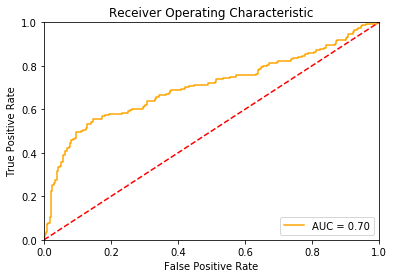

In [26]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 Confusion matrix
                 Score positive    Score negative
Actual positive       336                 0
Actual negative       164                 0

Accuracy  0.67
 
           Positive      Negative
Num case      336           164
Precision    0.67          0.00
Recall       1.00          0.00
F1           0.80          0.00


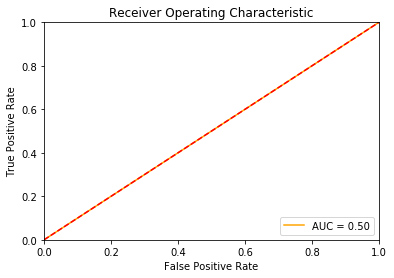

In [27]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive) 

In [28]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.60668397 0.39331603]
 [0.70833967 0.29166033]
 [0.70597804 0.29402196]
 [0.53988152 0.46011848]
 [0.68148291 0.31851709]
 [0.76803033 0.23196967]
 [0.75121903 0.24878097]
 [0.55119021 0.44880979]
 [0.79244893 0.20755107]
 [0.10408351 0.89591649]
 [0.6624537  0.3375463 ]
 [0.79076877 0.20923123]
 [0.61422695 0.38577305]
 [0.7697771  0.2302229 ]
 [0.84483791 0.15516209]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive       304                32
Actual negative        73                91

Accuracy  0.79
 
           Positive      Negative
Num case      336           164
Precision    0.81          0.74
Recall       0.90          0.55
F1           0.85          0.63


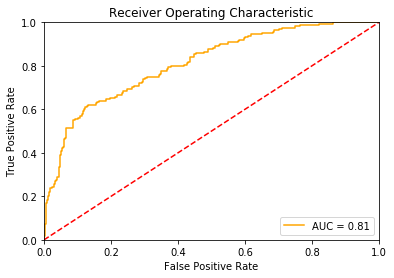

In [30]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

In [31]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive       295                41
Actual negative        64               100

Accuracy  0.79
 
           Positive      Negative
Num case      336           164
Precision    0.82          0.71
Recall       0.88          0.61
F1           0.85          0.66

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive       281                55
Actual negative        60               104

Accuracy  0.77
 
           Positive      Negative
Num case      336           164
Precision    0.82          0.65
Recall       0.84          0.63
F1           0.83          0.64

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive       252                84
Actual negative        50               114

Accuracy  0.73
 
           Positive      Negative
Num cas